<blockquote>
    
<b>Артём, привет!</b>
    
Меня зовут Андрей, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты" Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница
    
Можешь офрмлять их так:
 
<div class="alert alert-info"> <b>Комментарий студента:</b> 
 
 </div>
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!
</blockquote>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> 
    
Хорошее содержание, можно также добавить описание данных

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


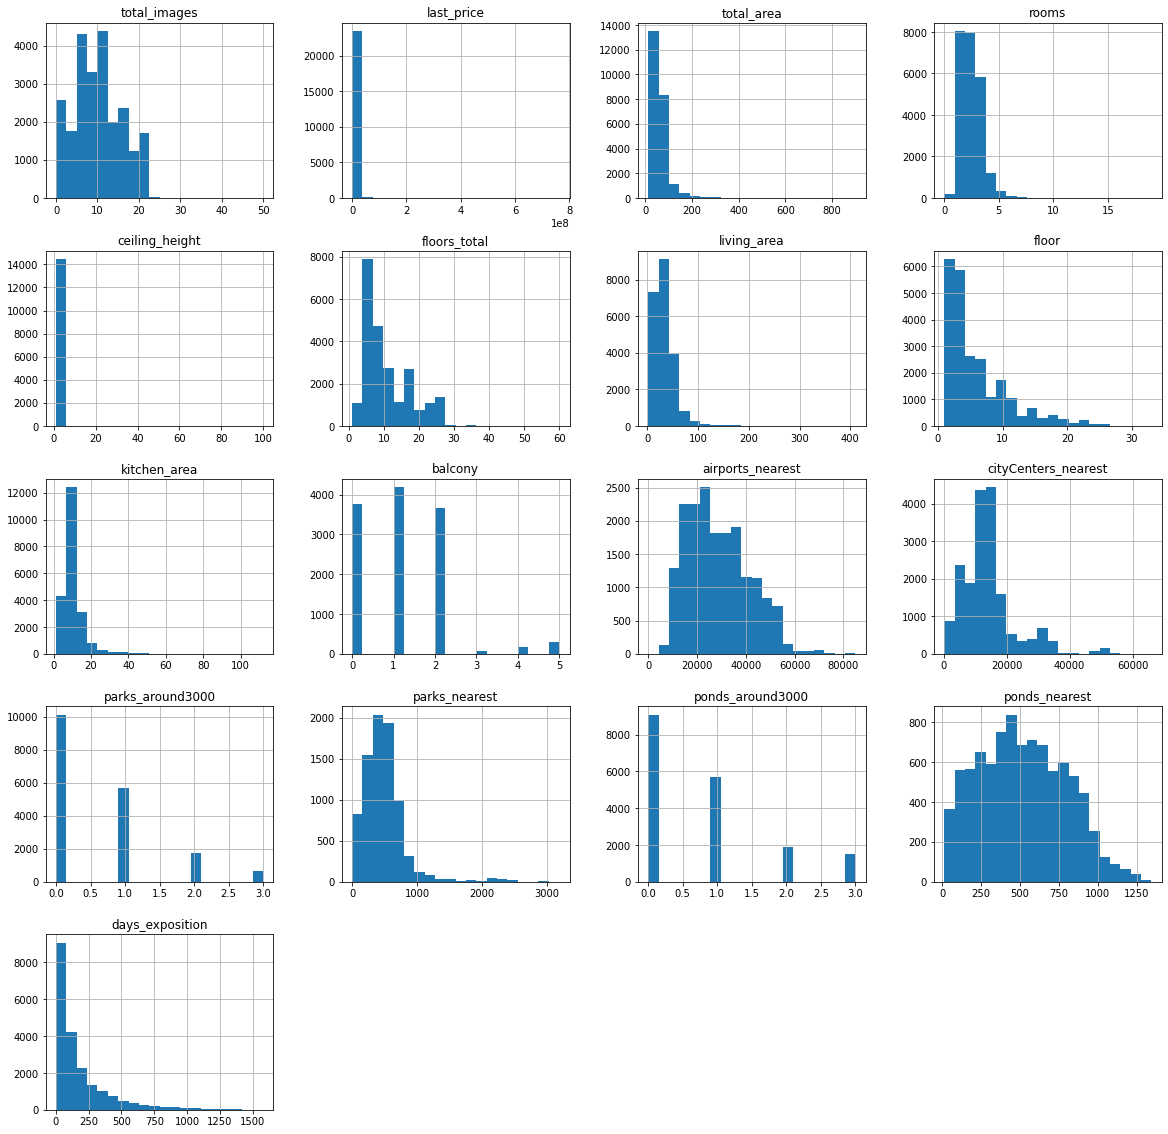

In [4]:
data.hist(bins=20, figsize=(20,20));
#бросим беглый взгляд на гистограммы и попытаемся понять, где у нас тут могут быть аномалии

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные прочитаны, предварительный осмотр данных проведен

Чтобы не было технических надписей над графиком надо добавить в конец символ ;

<div class="alert alert-info"> <b>Комментарий студента: не очень понял куда ставить символ ;</b> 

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
    data.hist(bins=20, figsize=(20,20));

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- В колонке 'balcony' значения NaN скорее всего говорят о том, что в квартире нет балконов, поэтому заменим на 0. 
- Аналогичные рассуждения можно применить для колонок 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' - скорее всего там просто нет поблизости парков и/или прудов. 
- 'days_exposition' заполнять не нужно, так как не все объявления сняты. 
- 'locality_name' невозможно заполнить, так как сложно угадать населенный пункт - можно запонлить "unnamed".
- Высоту потолков('ceiling_height') сложно оценить, но можно взять медианное значение и поставить в пропуски. 
- Пропуски в 'living_area', 'kitchen_area' можно также заменить медианным значением, но медиану брать среди недвижимости с соответствующим количеством комнат. Остальные колонки нужно внимательно изучить и понять из-за чего возникли пропуски.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Согласен с твоими рассуждениями

Насчёт площадей - можно воспользоваться аналогичным, немного более простым способом - посчитать коэффициент как в среднем соотносятся жилая и общая площадь по заполненым данным, и после заполнить пропуски умножив общую площадь на нужный коэффициент

In [6]:
data['balcony'].fillna(0, inplace=True)
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
data[(data['rooms']==0) & (data['kitchen_area'].isna() == True)]['studio']
#получается целых 197 значений.

144       True
349      False
440       True
508      False
608       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 197, dtype: bool

Сложно сказать, сколько комнат в квартире, опираясь исключительно на площадь. Бывают двухкомнатные квартиры с площадью 35 квадратных метров, а однушки с площадью 40. Эти данные исправлять не стоит. Посколько их число невелико, то можно просто исключить.

In [8]:
data = data.loc[data['rooms'] != 0]

In [9]:
data.loc[(data['rooms']==0), 'kitchen_area'] = 0
#Заполняю отдельно нулями места, где комнат нет.

In [10]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna() == True), 
             'kitchen_area'] = data.loc[data['rooms'] == i, 'kitchen_area'].median()

In [11]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna() == True), 
             'living_area'] = data.loc[data['rooms'] == i, 'living_area'].median()
data.isna().sum()
#Заполнили жилые площади и площади кухонь медианными значениями среди жилья с соответствующим количеством комнат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9080
floors_total               83
living_area                 0
floor                       0
is_apartment            20733
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5463
cityCenters_nearest      5440
parks_around3000            0
parks_nearest           15452
ponds_around3000            0
ponds_nearest           14461
days_exposition          3167
dtype: int64

**В объявлениях с 0 комнат невозможно взять медиану, потому что там везде NaN**

In [12]:
data.loc[data['floors_total'].isna()==True, 'floors_total'] = data['floor'] #там где нет общего числа этажей, ставим номер этажа, на котором находится кватртира
data.loc[(data['is_apartment'].isna()==True) & (data['floors_total'] > 4),'is_apartment'] = True #5 или больше этажей очевидно многоквартирные дома
data.loc[(data['is_apartment'].isna()==True) & (data['floors_total'] <= 4),'is_apartment'] = False #3, 2 или 1 этаж это скорее всего не апартаменты
data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'] = data['ceiling_height'].median()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,True,...,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,True,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,True,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,8.80,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.5,12,True,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [13]:
data['locality_name'].fillna('unnamed', inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5463
cityCenters_nearest      5440
parks_around3000            0
parks_nearest           15452
ponds_around3000            0
ponds_nearest           14461
days_exposition          3167
dtype: int64

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Некоторые замечания и рекомендации💡:</b> 
    
Можно также заполнить is_apartment - пропуски скорее всего не апартамены

<div class="alert alert-info"> <b>Комментарий студента: сделано!</b> 

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

***Теперь поменяем типы данных, где это необходимо***

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# переводим дату и время в формат datetime
data['floors_total'] = data['floors_total'].astype('int') #количество этажей может быть только целым - переводим в int
data['is_apartment'] = data['is_apartment'].astype('bool') #Поскольку там значения только true или false, то это boolean
data['locality_name'] = data['locality_name'].astype('string') #название города/поселка - это строка
data['balcony'] = data['balcony'].astype('int') #количество балконов может быть лишь целым
data['ponds_around3000'] = data['ponds_around3000'].astype('int') # число парков может быть лишь целым
data['parks_around3000'] = data['parks_around3000'].astype('int') # число прудов может быть лишь целым
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
#data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
# количество дней 'days_exposition' от публикации объявления до снятия - целое число, но там есть NaN, а значит не получится преобразовать в int
data.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23502 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23502 non-null  int64         
 1   last_price            23502 non-null  float64       
 2   total_area            23502 non-null  float64       
 3   first_day_exposition  23502 non-null  datetime64[ns]
 4   rooms                 23502 non-null  int64         
 5   ceiling_height        23502 non-null  float64       
 6   floors_total          23502 non-null  int64         
 7   living_area           23502 non-null  float64       
 8   floor                 23502 non-null  int64         
 9   is_apartment          23502 non-null  bool          
 10  studio                23502 non-null  bool          
 11  open_plan             23502 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>
    
Столбцы с пропусками можно перевести целочисленный формат так: .astype('Int64')

***Теперь необходимо обработать неявные дубликаты***

In [15]:
data.duplicated().sum() # явных дубликатов нет

0

In [16]:
print(*data['locality_name'].unique())

Санкт-Петербург посёлок Шушары городской посёлок Янино-1 посёлок Парголово посёлок Мурино Ломоносов Сертолово Петергоф Пушкин деревня Кудрово Коммунар Колпино поселок городского типа Красный Бор Гатчина поселок Мурино деревня Фёдоровское Выборг Кронштадт Кировск деревня Новое Девяткино посёлок Металлострой посёлок городского типа Лебяжье посёлок городского типа Сиверский поселок Молодцово поселок городского типа Кузьмоловский садовое товарищество Новая Ропша Павловск деревня Пикколово Всеволожск Волхов Кингисепп Приозерск Сестрорецк деревня Куттузи посёлок Аннино поселок городского типа Ефимовский посёлок Плодовое деревня Заклинье поселок Торковичи поселок Первомайское Красное Село посёлок Понтонный Сясьстрой деревня Старая деревня Лесколово посёлок Новый Свет Сланцы село Путилово Ивангород Мурино Шлиссельбург Никольское Зеленогорск Сосновый Бор поселок Новый Свет деревня Оржицы деревня Кальтино Кудрово поселок Романовка посёлок Бугры поселок Бугры поселок городского типа Рощино Кириши

In [17]:
#data['locality_name'].unique()
# создадим новую колонку с именами населенных пунктов, где не будет лишних слов
data['locality_name'] = data['locality_name'].str.replace('ё','е')
key = ['поселок при железнодорожной станции ', 'садовое товарищество ', 'поселок станции ', 'станции ', 
       'поселок городского типа ', 'коттеджный поселок ', 'городской поселок ', 'садоводческое некоммерческое товарищество ', 
       'деревня ' , 'поселок ', 'село']
    
def remove_water(row):
    try:
        for i in key:
            if i in row:
                row = row.replace(i,'')
                return row
        return row
    except:
        return row
data['locality_name_new'] = data['locality_name'].apply(remove_water)
data.duplicated().sum()

0

In [18]:
key=['locality_name_new', 'last_price','total_area','rooms','ceiling_height', 'floors_total', 'living_area', 'floor','kitchen_area', 'balcony']
data.groupby(key)['locality_name_new'].count().sort_values(ascending=False).head(20)

#видим, что имеется 14 неявных дубликатов(сделал проверку по набору ключевых признаков)

locality_name_new  last_price  total_area  rooms  ceiling_height  floors_total  living_area  floor  kitchen_area  balcony
Санкт-Петербург    5602774.0   81.90       3      2.75            23            45.60        13     15.50         0          2
                   4000000.0   56.00       2      2.80            24            26.00        6      15.00         2          2
                   3500000.0   45.60       2      2.65            5             28.50        3      6.70          0          2
                   5500000.0   57.00       2      2.70            12            30.00        11     8.00          2          2
                   8500000.0   64.50       2      2.65            19            34.80        18     10.40         0          2
                   11500000.0  71.41       2      2.73            20            40.32        10     11.35         0          2
Никольское         2533531.0   42.50       1      2.56            18            19.80        7      9.04          0 

In [19]:
data.drop_duplicates(subset=key) #удалим дубликаты

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863,16028.0,1,482,2,755,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,2,поселок Шушары,12817,18603.0,0,<NA>,0,<NA>,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,True,...,0,Санкт-Петербург,28098,6800.0,2,84,3,234,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,0,Санкт-Петербург,24665,4232.0,1,796,3,381,NaN,Санкт-Петербург
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,0,Тосно,<NA>,NaN,0,<NA>,0,<NA>,45.0,Тосно
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,село Рождествено,<NA>,NaN,0,<NA>,0,<NA>,NaN,Рождествено
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,...,2,Санкт-Петербург,39140,10364.0,2,173,3,196,602.0,Санкт-Петербург


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Можно также провести оценку насколько удалось сократить количество уникальных названий. Для этого можно воспользоваться методом .nunique()

**Найдем и устраним явно неверные значения.**

count    23502.000000
mean         2.723397
std          0.979430
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

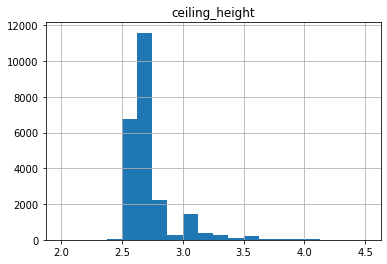

355       25.0
3148      32.0
4643      25.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
15061     14.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22309     10.3
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [20]:
display(data['ceiling_height'].describe())
data.hist('ceiling_height', bins=20, range = (2, 4.5))
plt.show()
data.loc[data['ceiling_height'] > 10, 'ceiling_height']

- Видно, что распределение значений близко к распределению Пуассона, есть аномалия в районе 3.
- Максимальное значение равно 100. Это слишком много. Плохие данные есть, а значит их нужно обработать

In [21]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
# поправили выбивающиеся значения в столбце ceiling height
print(data['last_price'].count())
display(data[data['ceiling_height'] > 4.5])
print(data.loc[((data['ceiling_height'] > 4.5) & (data['total_area'] < 100)), 'ceiling_height'].count())
data = data.loc[((data['ceiling_height'] <= 4.5) & 
                 (data['ceiling_height'] >=2.4)) | ((data['ceiling_height'] > 4.5) & (data['total_area'] > 100))]
data = data.reset_index(drop=True)

23502


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.500,7,True,...,0,Санкт-Петербург,26316,6655.0,3,187,1,616,578.0,Санкт-Петербург
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.000,3,False,...,2,Санкт-Петербург,24899,4785.0,0,<NA>,1,603,NaN,Санкт-Петербург
1053,13,550000.0,29.0,2018-02-01,1,5.00,3,17.600,1,False,...,0,Бокситогорск,<NA>,NaN,0,<NA>,0,<NA>,6.0,Бокситогорск
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4,162.000,3,False,...,0,Санкт-Петербург,24680,4247.0,1,464,3,339,225.0,Санкт-Петербург
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6,91.785,6,True,...,0,Санкт-Петербург,26204,6934.0,2,149,2,577,719.0,Санкт-Петербург
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3,30.000,2,False,...,0,Санкт-Петербург,24433,1725.0,1,589,3,161,160.0,Санкт-Петербург
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5,15.300,2,False,...,0,деревня Нурма,<NA>,NaN,0,<NA>,0,<NA>,125.0,Нурма
5863,20,5650000.0,45.0,2018-08-15,1,8.30,16,19.300,14,True,...,1,Санкт-Петербург,13069,10763.0,0,<NA>,1,613,14.0,Санкт-Петербург
7578,17,38000000.0,143.0,2017-11-02,3,5.50,5,83.000,5,True,...,1,Санкт-Петербург,26333,6448.0,3,479,0,<NA>,NaN,Санкт-Петербург
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.500,7,True,...,0,Санкт-Петербург,<NA>,5735.0,2,110,0,<NA>,14.0,Санкт-Петербург


9


In [22]:
display(data[data['ceiling_height'] > 4.5])
display(data['last_price'].count())

#data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
460,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.500,7,True,...,0,Санкт-Петербург,26316,6655.0,3,187,1,616,578.0,Санкт-Петербург
1014,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.000,3,False,...,2,Санкт-Петербург,24899,4785.0,0,<NA>,1,603,NaN,Санкт-Петербург
1282,14,120000000.0,280.0,2018-07-12,5,4.70,4,162.000,3,False,...,0,Санкт-Петербург,24680,4247.0,1,464,3,339,225.0,Санкт-Петербург
1370,20,59800000.0,399.0,2015-01-21,5,5.60,6,91.785,6,True,...,0,Санкт-Петербург,26204,6934.0,2,149,2,577,719.0,Санкт-Петербург
7500,17,38000000.0,143.0,2017-11-02,3,5.50,5,83.000,5,True,...,1,Санкт-Петербург,26333,6448.0,3,479,0,<NA>,NaN,Санкт-Петербург
12283,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.500,7,True,...,0,Санкт-Петербург,<NA>,5735.0,2,110,0,<NA>,14.0,Санкт-Петербург
20068,17,119000000.0,187.6,2017-07-10,4,6.00,7,147.000,7,True,...,0,Санкт-Петербург,26902,5605.0,3,484,1,305,259.0,Санкт-Петербург
21713,10,115490000.0,235.0,2017-04-09,5,4.90,5,140.000,5,True,...,0,Санкт-Петербург,22777,1328.0,3,652,3,253,351.0,Санкт-Петербург


23468

# ВЫВОДЫ:
- Данные в таблице содержат больщое колличество пропусков, но они были по возможности заполнены(нулями, медианными значениями)
- Причины пропусков могут быть разными - от банальной халатности при публикации(забыли заполнить) до сбоя
- Дубликаты убраны. Явных не было, а вот неявные пришлось убирать.
- Также преобразованы типы данных в соответствующие по смыслу
- Избавился от аномалий в столбцах "ceiling_height" и "rooms". В остальных столбцах явно неверных значений нет.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
 
 
<b>На доработку🤔:</b>
    
Выбросы надо удалить не только для высоты потолка

    Попробуйте обработать аномалии в этом и других столбцах.

<div class="alert alert-info"> <b>Комментарий студента: Я также убрал даннные, где 0 комнат(см. выше)</b> 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера-2 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Да, но надо очистить данные от выбросов и в других столбцах - стоимости, общей площади, количестве комнат

    В противном случае удалите редкие и выбивающиеся значения.
    
После фильтрации надо не забыть сравнить получившийся размер датафрейма с исходным - если удалено больше 10% от исходного количество объявлений, надо пересмотрить условия фильтрации

<div class="alert alert-info"> <b>Комментарий студента-2: Отбросил аномальные данные в конце пункта 4.1(так как фильтрация основывается на данных, представленных в пункте 4.1)</b> 

<div class="alert alert-success">
<h2> Комментарий ревьюера-3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Посчитайте и добавьте в таблицу новые столбцы

**1) Цена за квадратный метр** 

In [23]:
data['meter_price'] = round(data['last_price'] / data['total_area'], 1) #округлим до 1-го знака после запятой.
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,Санкт-Петербург,18863,16028.0,1,482,2,755,NaN,Санкт-Петербург,120370.4
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,поселок Шушары,12817,18603.0,0,<NA>,0,<NA>,81.0,Шушары,82920.8
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,Санкт-Петербург,21741,13933.0,1,90,2,574,558.0,Санкт-Петербург,92785.7
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,True,...,Санкт-Петербург,28098,6800.0,2,84,3,234,424.0,Санкт-Петербург,408176.1
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,Санкт-Петербург,31856,8098.0,2,112,1,48,121.0,Санкт-Петербург,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,Санкт-Петербург,24665,4232.0,1,796,3,381,NaN,Санкт-Петербург,72490.8
23464,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,Тосно,<NA>,NaN,0,<NA>,0,<NA>,45.0,Тосно,52542.4
23465,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,село Рождествено,<NA>,NaN,0,<NA>,0,<NA>,NaN,Рождествено,44091.7
23466,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,...,Санкт-Петербург,39140,10364.0,2,173,3,196,602.0,Санкт-Петербург,149511.4


**2) День, месяц, год публикации объявления**

In [24]:
data['publish_day'] = data['first_day_exposition'].dt.weekday #день
data['publish_month'] = data['first_day_exposition'].dt.month #месяц
data['publish_year'] = data['first_day_exposition'].dt.year #год
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,meter_price,publish_day,publish_month,publish_year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,1,482,2,755,NaN,Санкт-Петербург,120370.4,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,0,<NA>,0,<NA>,81.0,Шушары,82920.8,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,1,90,2,574,558.0,Санкт-Петербург,92785.7,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,True,...,2,84,3,234,424.0,Санкт-Петербург,408176.1,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,2,112,1,48,121.0,Санкт-Петербург,100000.0,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,1,796,3,381,NaN,Санкт-Петербург,72490.8,1,3,2017
23464,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,0,<NA>,0,<NA>,45.0,Тосно,52542.4,0,1,2018
23465,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,<NA>,0,<NA>,NaN,Рождествено,44091.7,6,2,2018
23466,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,...,2,173,3,196,602.0,Санкт-Петербург,149511.4,1,3,2017


**3) Тип этажа квартиры**

In [25]:
def floor_category_func(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
        

data['floor_category'] = data.apply(floor_category_func, axis=1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,meter_price,publish_day,publish_month,publish_year,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,482,2,755,NaN,Санкт-Петербург,120370.4,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,<NA>,0,<NA>,81.0,Шушары,82920.8,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,90,2,574,558.0,Санкт-Петербург,92785.7,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,True,...,84,3,234,424.0,Санкт-Петербург,408176.1,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112,1,48,121.0,Санкт-Петербург,100000.0,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,796,3,381,NaN,Санкт-Петербург,72490.8,1,3,2017,другой
23464,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,<NA>,0,<NA>,45.0,Тосно,52542.4,0,1,2018,другой
23465,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,<NA>,0,<NA>,NaN,Рождествено,44091.7,6,2,2018,первый
23466,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,...,173,3,196,602.0,Санкт-Петербург,149511.4,1,3,2017,другой


**4) Расстояние до центра города в километрах**

In [26]:
data['kilometres_to_city_centre'] = round(data['cityCenters_nearest'] / 1000)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,meter_price,publish_day,publish_month,publish_year,floor_category,kilometres_to_city_centre
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,2,755,NaN,Санкт-Петербург,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,0,<NA>,81.0,Шушары,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,2,574,558.0,Санкт-Петербург,92785.7,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,True,...,3,234,424.0,Санкт-Петербург,408176.1,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,1,48,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,3,381,NaN,Санкт-Петербург,72490.8,1,3,2017,другой,4.0
23464,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,0,<NA>,45.0,Тосно,52542.4,0,1,2018,другой,NaN
23465,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,<NA>,NaN,Рождествено,44091.7,6,2,2018,первый,NaN
23466,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,True,...,3,196,602.0,Санкт-Петербург,149511.4,1,3,2017,другой,10.0


**Выводы:**
- Успешно посчитаны метрики и добавлены в таблицу
- Названия для новых столбцов выбраны, исходя из содержимого
- В новых столбцах пропуски там, где были пропуски в исходных данных

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>

### Проведите исследовательский анализ данных

#### Изучение параметров

**Общая площадь**

count    23468.000000
mean        60.625338
std         35.628487
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

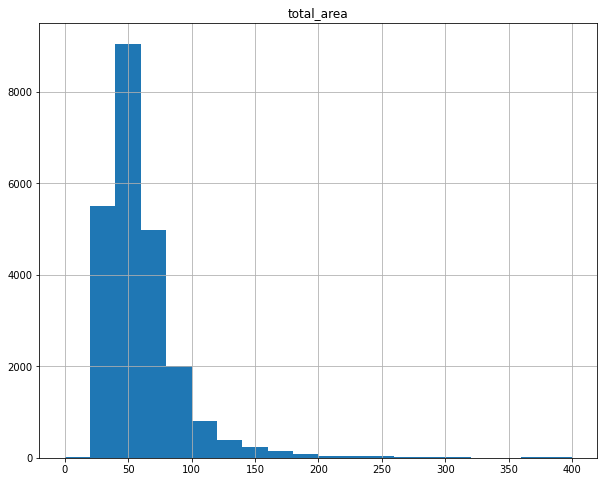

In [27]:
display(data['total_area'].describe())
data.hist('total_area', bins=20, range = (0, 400),  figsize=(10,8))
plt.show()

- Очень близко к распределению Пуассона, без аномалий.
- Медиана и среднее близки
- Минимум и максимум очень разнятся. 12 метров - это скорее всего комната, а 900 - что-то из класса "люкс"
- Видно, что после 250 значений очень мало. Можно принять их за выбросы


**Жилая площадь**

count    23468.000000
mean        34.459004
std         21.745829
min          2.000000
25%         18.500000
50%         30.500000
75%         42.900000
max        409.700000
Name: living_area, dtype: float64

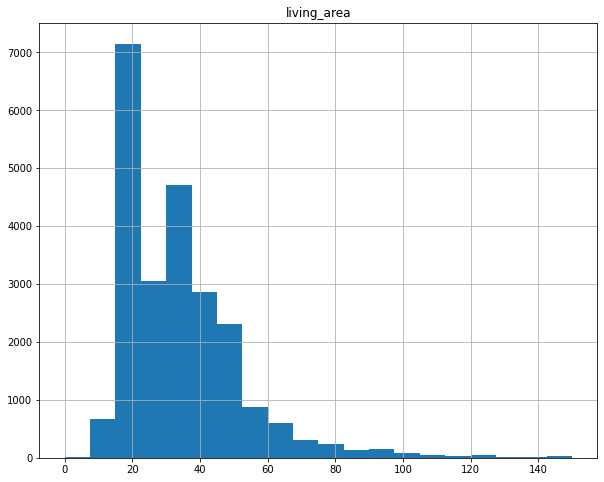

In [28]:
display(data['living_area'].describe())
data.hist('living_area', bins=20, range = (0, 150),  figsize=(10,8))
plt.show()

- Вновь похоже на распределение Пуассона, но с всплеском в начале
- Минимум - 2 метра, довольно мало для "жилой площади". Максимум 409, видимо снова "люкс"
- Среднее и медианные значения близки
- После 120 квадратных метров - выбросы(их очень мало)

**Кухонная площадь**

count    23468.000000
mean        10.466772
std          5.666426
min          1.300000
25%          7.300000
50%          9.040000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

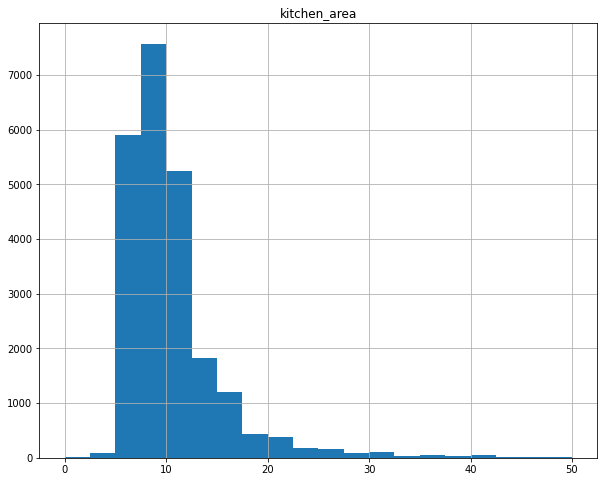

In [29]:
display(data['kitchen_area'].describe())
data.hist('kitchen_area', bins=20, range = (0, 50),  figsize=(10,8))
plt.show()

- Вновь распределение Пуассона, без явных аномалий
- Минимум - 1.3 метра(что-то очень уж мало), максимум нормальный
- Среднее и медианные значения близки
- После 40 квадратных метров - выбросы(их очень мало)

**Цена**

count    2.346800e+04
mean     6.571577e+06
std      1.092561e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

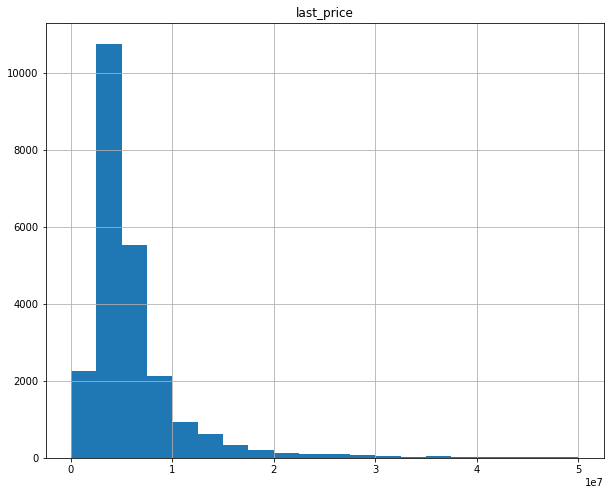

In [30]:
display(data['last_price'].describe())
data.hist('last_price', bins=20, range = (0, 50000000),  figsize=(10,8))
plt.show()

- Распределение близко к распределению Пуассона, без аномалий
- Минимальная цена 12190 - очень мало(подозрительно).
- Максимальное значение - 760.000.000. Неплохо.
- Медиана 4.700.000 меньше среднего 6.500.000, данные смещены влево. Дорогая недвижимость вносит большой вклад в среднее значение.
- Все, что больше 50.000.000 - можно принять за аномальные значения

**Комнаты**

count    23468.000000
mean         2.088376
std          1.066357
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

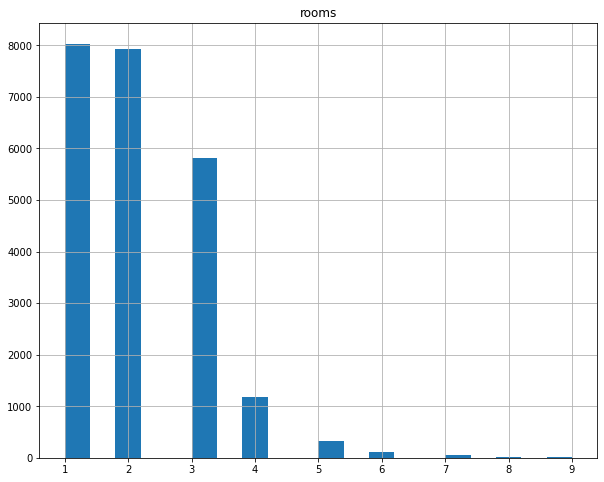

In [31]:
display(data['rooms'].describe())
data.hist('rooms', bins=20, range = (1,9),  figsize=(10,8))
plt.show()

- Распределение похоже на распределение Пуассона, без аномалий
- Минимум 1(квартиры с нулем комнат были убраны ранее). Максимальное значение - 19
- Все, что после 6 можно принять за выбросы.
- Медианное и среднее значения равны 2, данные не смещены.

**Высота потолков**

count    23468.000000
mean         2.696837
std          0.218248
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

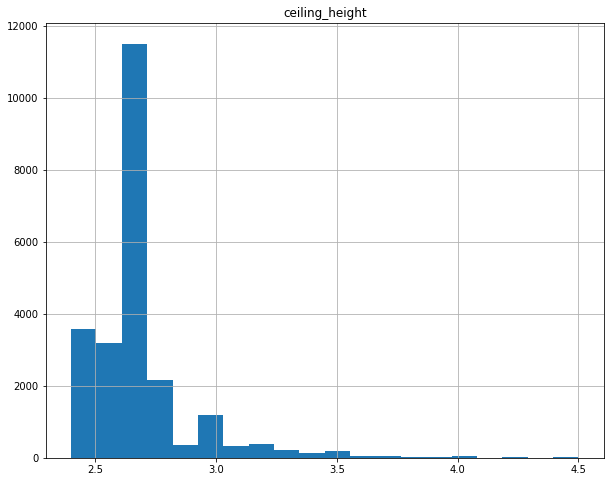

In [32]:
display(data['ceiling_height'].describe())
data.hist('ceiling_height', bins=20, range = (2.4, 4.5),  figsize=(10,8))
plt.show()

- Распределение близко к распределению Пуассона. Аномалия на 3 м. 
- Максимальное значение - 6 м (после нашей обработки)
- Минимальное значение - 2.4 м(мы отбросили все меньшее)
- Медианное и среднее значения равны 2.65 и 2.69 соответственно. Смещения почти нет.

**Этаж**

count    23468.000000
mean         5.869993
std          4.864764
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

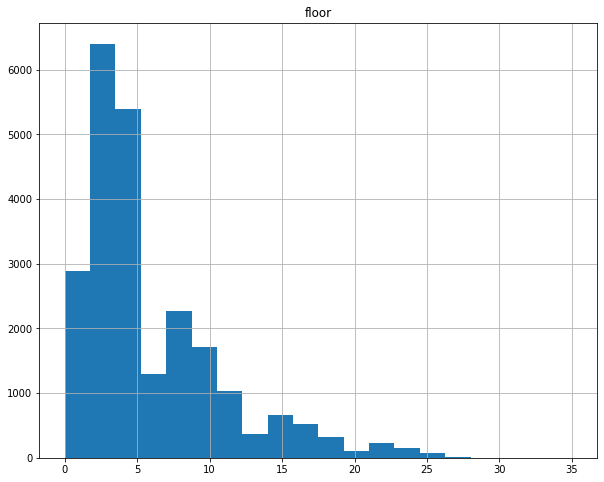

In [33]:
display(data['floor'].describe())
data.hist('floor', bins=20, range = (0,35), figsize=(10,8))
plt.show()

- Распределение близко к распределению Пуассона. Аномалии на 5-7 м, 12-14 м и в районе 20 м. 
- Максимальное значение - 33 этаж
- Минимальное значение - 1 этаж
- Медианное и среднее значения равны 4 и 5.86 соответственно. Смещение влево, так как выбросы немного завышают среднее.

**Этаж(первый/последний/другой)**

count      23468
unique         3
top       другой
freq       17178
Name: floor_category, dtype: object

<AxesSubplot:>

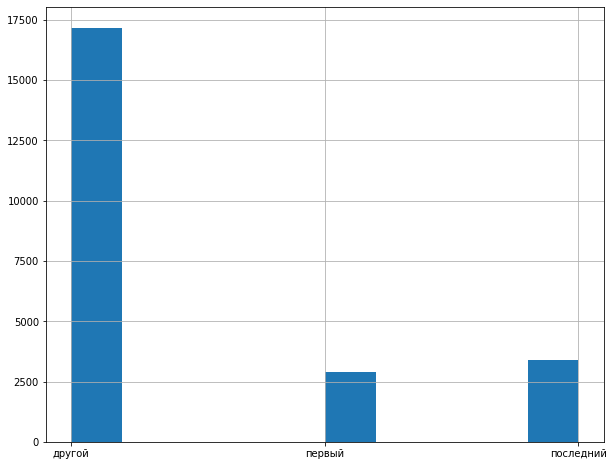

In [34]:
data['locality_name_new'] = data['locality_name_new'].astype('string')
data['floor_category'] = data['floor_category'].astype('string')
display(data['floor_category'].describe())
data['floor_category'].hist(bins = 10, range = (0,2),  figsize=(10,8))

- Подавляющее большинство не первых и не последних этажей. Но при этом все равно довольно много - приблизительно четверть от общего числа квартир
- Первых этажей и последних примерно одинаковое количество

**Количество этажей**

count    23468.000000
mean        10.621485
std          6.567042
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

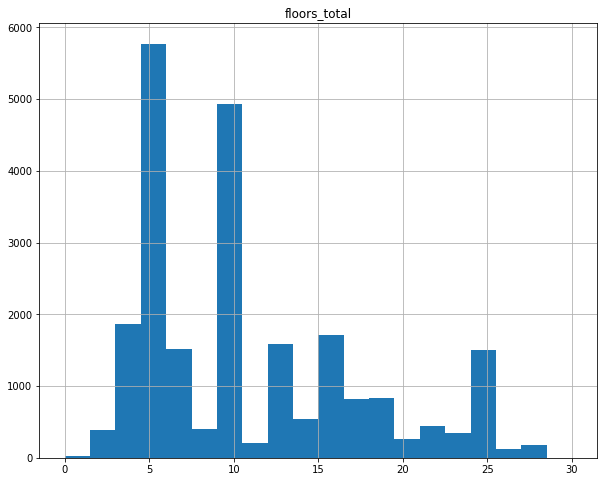

In [35]:
display(data['floors_total'].describe())
data.hist('floors_total', bins=20, range = (0,30),  figsize=(10,8))
plt.show()

- Слишком много аномалий, но напоминает распределение Пуассона. Аномалии на 9-10(очень большая), 11-12, 15-16 и 24-25
- Минимум 1, максимум 60. Все хорошо
- Среднее 10.6, медианное - 9. Близко, небольшое смещение влево
- После 30 этажа можно принять за выбросы


**Расстояние до центра в метрах**

count    18045.000000
mean     14197.542477
std       8628.256044
min        181.000000
25%       9234.000000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

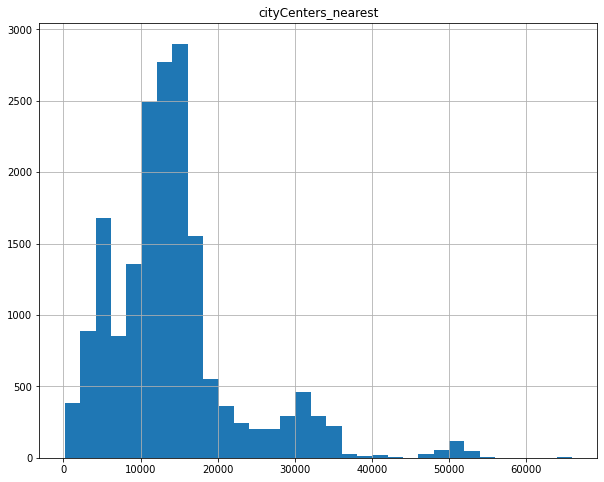

In [36]:
display(data['cityCenters_nearest'].describe())
data.hist('cityCenters_nearest', bins=33, figsize=(10,8))
plt.show()

- Распределение Пуассона с аномалиями от 4000 до 8000 и небольшими в районе 30000 и 50000
- Минимум 181 метр, максимум 65968
- Медиана и среднее - 13094 и 14197. Отличаются несильно, небольшое смещение влево.
- После 40000 - аномальные значения

**Расстояние до ближайшего аэропорта в метрах**

count    18022.000000
mean     28822.028576
std      12630.383670
min          0.000000
25%      18603.500000
50%      26757.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

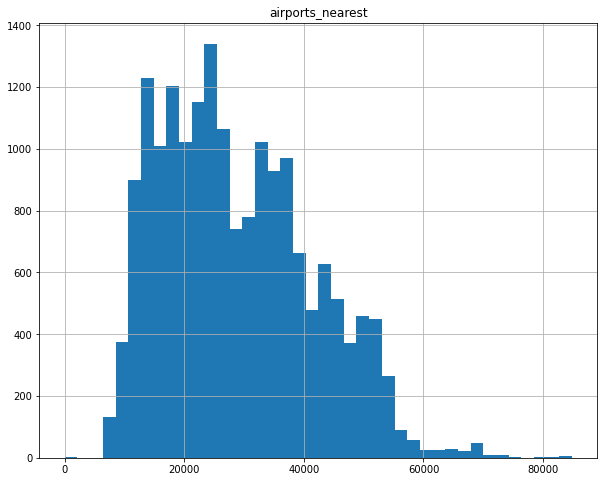

In [37]:
display(data['airports_nearest'].describe())
data.hist('airports_nearest', bins=40, figsize=(10,8))
plt.show()

- Напоминает распределение Пуассона, но с большим количеством аномальных пиков.
- Минимум 0(кто-то живет в аэропорту?), максимум 84869(не очень удобно летать)
- Медиана и среднее - 26757 и 28882. Отличаются несильно, небольшое смещение влево засчет аномалий.
- После 65000 - аномальные значения

count    8039.000000
mean      490.284115
std       342.466854
min         1.000000
25%       287.000000
50%       453.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

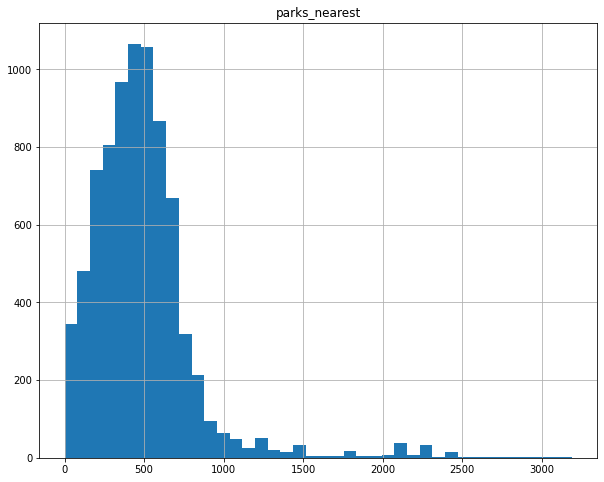

In [38]:
display(data['parks_nearest'].describe())
data.hist('parks_nearest', bins=40, figsize=(10,8))
plt.show()

- Очень похоже на распределение Пуассона, аномалий нет.
- Минимум 1 метр(не верится что-то), максимум 3190(целых 3 км, но терпимо)
- Медиана 455, среднее 490 - маленькое смещение есть, но оно незначительное. 
- Аномалии после 2000 м

count    23468.000000
mean         2.568050
std          1.790068
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publish_day, dtype: float64

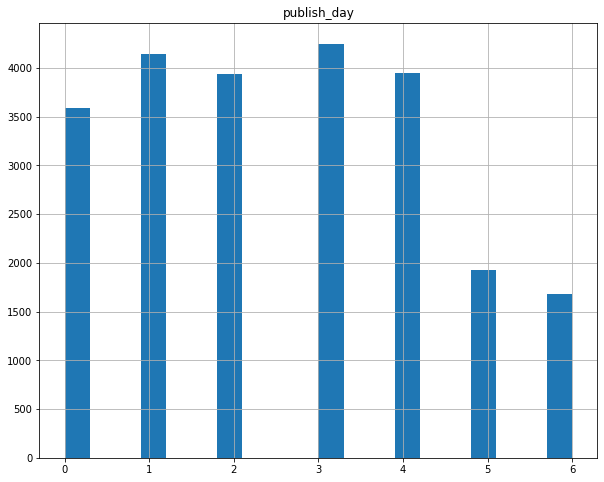

In [39]:
display(data['publish_day'].describe())
data.hist('publish_day', bins=20, figsize=(10,8))
plt.show()

- Как ни странно - вновь похоже на Пуассоновское распределение
- Среднее 2.56, медиана 3. Отклонение незначительное. Все в порядке.

count    23468.000000
mean         6.394324
std          3.490797
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publish_month, dtype: float64

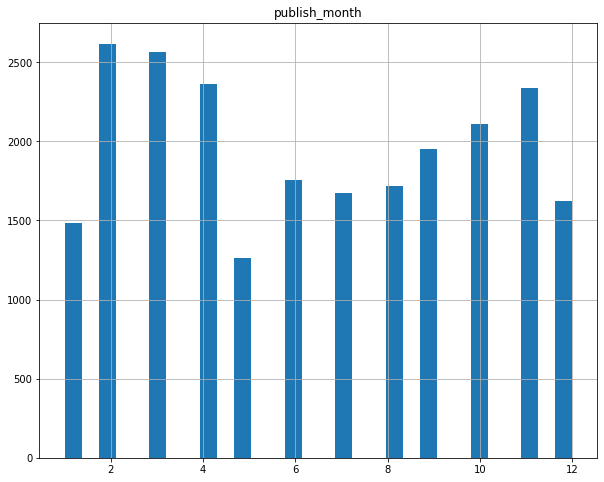

In [40]:
display(data['publish_month'].describe())
data.hist('publish_month', bins=30, figsize=(10,8))
plt.show()

- Похоже на Пуассоновское распределение, если начинать смотреть на него с сентября, а не с января(аномалия в январе).
- Медиана и среднее при этом близки - 6.0 и 6.39
- Интересно, что пик публикаций приходится на конец осени и на конец зимы-начало весны(с перерывом на Новый год видимо). Летом люди публикуют объявления сильно реже

**Основываясь на данных выводах и гистограммах, уберем аномальные значения**

In [41]:
data = data.loc[(data['last_price'] <= 50000000) & (data['last_price'] >= 1000000)]
data = data.loc[(data['total_area']  > 15) & (data['total_area']  < 250)]
data = data.loc[(data['living_area']  > 5) & (data['living_area']  < 120)]
data = data.loc[(data['kitchen_area']  >= 5) & (data['kitchen_area']  <= 40)]
data = data.loc[(data['rooms'] < 7)]
data = data.loc[(data['floors_total']  <= 35)]
data = data.loc[(data['cityCenters_nearest'] < 40000)| (data['cityCenters_nearest'].isna() == True)]
data = data.loc[((data['airports_nearest'] > 5000) & (data['airports_nearest'] < 65000)) | (data['airports_nearest'].isna() == True)]
data = data.loc[(data['parks_nearest'] < 2000) | (data['parks_nearest'].isna() == True)]
data = data.loc[(data['days_exposition'] < 700) | (data['days_exposition'].isna() == True)]
print(21533 / 23699) # удалено 9.2% данных
data.info()

0.9086037385543694
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 23467
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               21533 non-null  int64         
 1   last_price                 21533 non-null  float64       
 2   total_area                 21533 non-null  float64       
 3   first_day_exposition       21533 non-null  datetime64[ns]
 4   rooms                      21533 non-null  int64         
 5   ceiling_height             21533 non-null  float64       
 6   floors_total               21533 non-null  int64         
 7   living_area                21533 non-null  float64       
 8   floor                      21533 non-null  int64         
 9   is_apartment               21533 non-null  bool          
 10  studio                     21533 non-null  bool          
 11  open_plan                  21533 non-null  bool 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>
    
Всё верно, здорово, что подбираешь количество корзин для каждого признака.

У графиков нужно добавлять заголовки и подписи к осям.

#### Как быстро продавались квартиры?

count    18587.000000
mean       147.275999
std        150.496248
min          1.000000
25%         43.000000
50%         90.000000
75%        202.000000
max        699.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

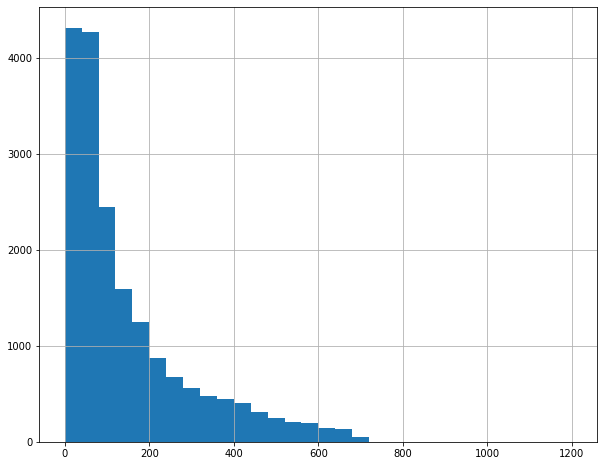

In [42]:
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins=30, figsize=(10,8), range = (0,1200))

- Пуассоновское распределение, сильно смещенное влево из-за аномалий.
- Среднее значение почти в 1.5 раза больше медианного. Данные сильно смещены влево. Аномалии сильно мешают.
- Большинство квартир продается в пределах 500 дней(232 - это 75%). 
- Быстрые продажи происходили за 1 день - это минимум. 
- Все квартиры, что продавались дольше 500 дней - долгие.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**1) Площадь**

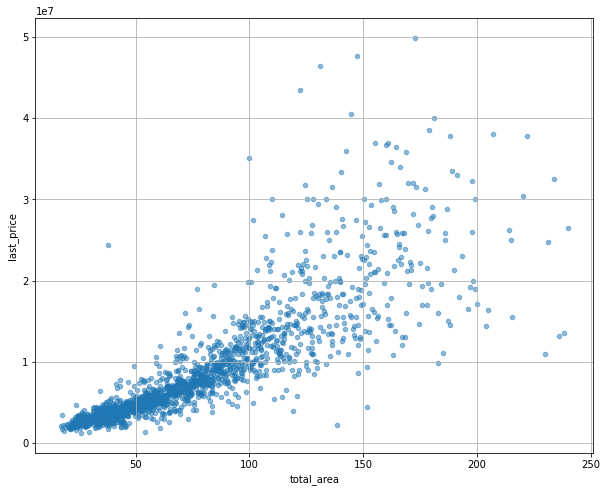

Корреляция Пирсона:  0.76


,total_area,last_price
0,17.20,2050000.0
1,17.60,3400000.0
2,17.78,1737000.0
3,18.00,2250000.0
4,18.50,1500000.0
...,...,...
1881,231.20,24800000.0
1882,234.00,32500000.0
1883,236.00,13200000.0
1884,238.26,13545000.0


In [43]:
table1 = pd.pivot_table(data, index=['total_area'], values=['last_price'])
table1 = table1.reset_index(drop=False)
#table1 = table3.rename(columns={'mean':'mean_price'})
table1.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10,8), alpha=0.5)
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['total_area']), 2))
table1

- Видно, что в основном с увеличением площади увеличивается и цена.
- Это подтверждает и коэффициент корреляции Пирсона - 0.76

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
 
<b>На доработку🤔:</b>
    
Не надо делать аггрегацию данных - диаграмму рассеяния ты можешь сделать по всем данным, и это будет корректнее - каждой точке на графике будет соответствовать объявление. Можно добавить немного прозрачности точкам для улучшения визуализации

<div class="alert alert-info"> <b>Комментарий студента: сделано!</b> 

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>

**2) Жилая площадь**

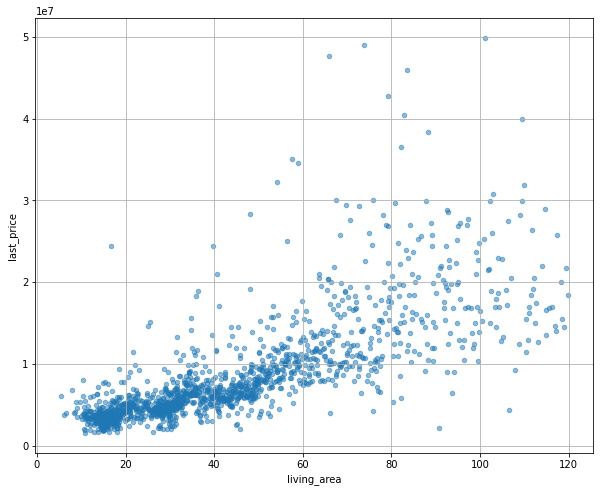

Корреляция Пирсона:  0.63


In [44]:
table2 = pd.pivot_table(data, index=['living_area'], values=['last_price'])
table2 = table2.reset_index(drop=False)
#table2 = table3.rename(columns={'mean':'mean_price'})
table2.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(10,8), alpha=0.5)
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['living_area']), 2))

- Видно, что в основном с увеличением жилой площади увеличивается и цена. 
- Это подтверждает и коэффициент корреляции Пирсона - 0.63. Похуже, чем с общей площадью, но все равно зависимость имеется.

**3) Площадь кухни**

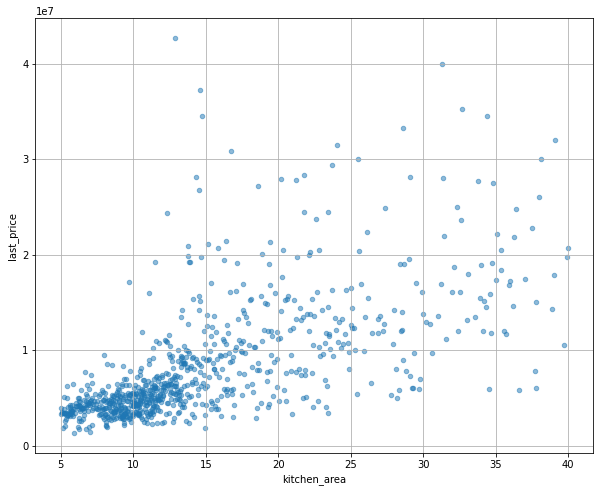

Корреляция Пирсона:  0.54


In [45]:
table3 = pd.pivot_table(data, index=['kitchen_area'], values=['last_price'])
table3 = table3.reset_index(drop=False)
#table3 = table3.rename(columns={'mean':'mean_price'})
table3.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10,8), alpha=0.5)
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['kitchen_area']), 2))

- Тут тоже видно, что в основном с увеличением жилой площади увеличивается и цена. 
- Это подтверждает и коэффициент корреляции Пирсона - 0.54. Зависимость есть. 

**4) Количество комнат**

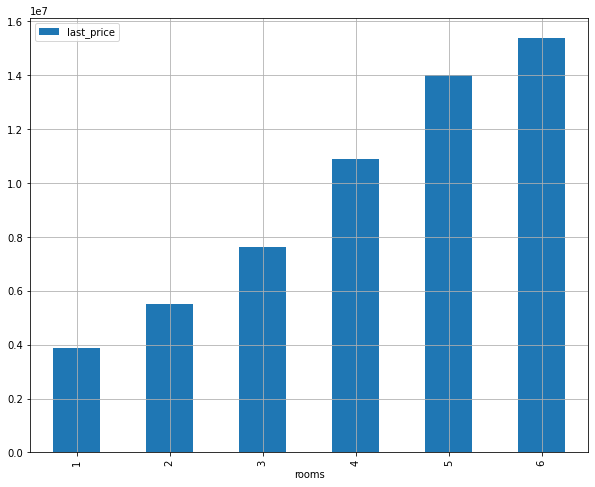

Корреляция Пирсона:  0.46


In [46]:
table4 = pd.pivot_table(data, index=['rooms'], values=['last_price'])
table4 = table4.reset_index(drop=False)
#table4 = table4.rename(columns={'mean':'mean_price'})
table4.plot(x='rooms', y='last_price', kind='bar', grid=True, figsize=(10,8))
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['rooms']), 2))

- Тут не так однозначно видно, что с увеличением числа комнат увеличивется и цена. Когда комнат 7+, цена начинает падать, но эти значения можно считать аномальными.
- Коэффициент корреляции Пирсона - 0.46. Зависимость еще более слабая, но есть.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Некоторые замечания и рекомендации💡:</b>
    
Тут у тебя на осях есть дробные комнаты, такого быть не должно=) Лучше использовать столбчатую диаграмму, такой тип визуализации будет проще воспринимать и не будет дробного количества комнат на осях

<div class="alert alert-info"> <b>Комментарий студента: сделано!</b> 

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>

**5) Этаж (первый, последний или другой)**

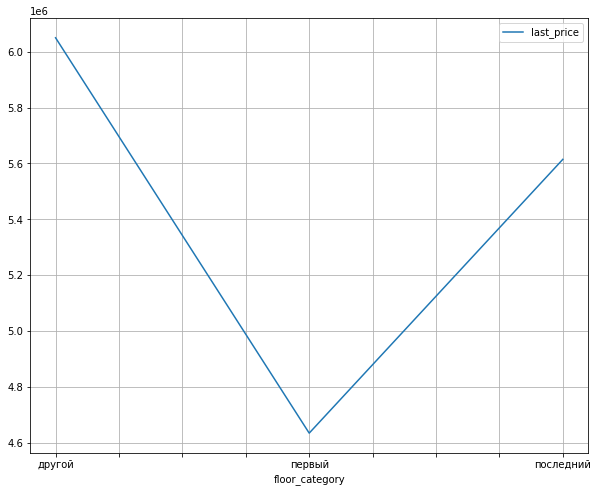

In [47]:
table5 = pd.pivot_table(data, index=['floor_category'], values=['last_price'])
table5 = table5.reset_index(drop=False)
#table5 = table5.rename(columns={'mean':'mean_price'})
table5.plot(x='floor_category', y='last_price', kind='line', grid=True, figsize=(10,8))
plt.show()

- На первом этаже самые дешевые квартиры, в то время как на последних этажах самые дорогие.

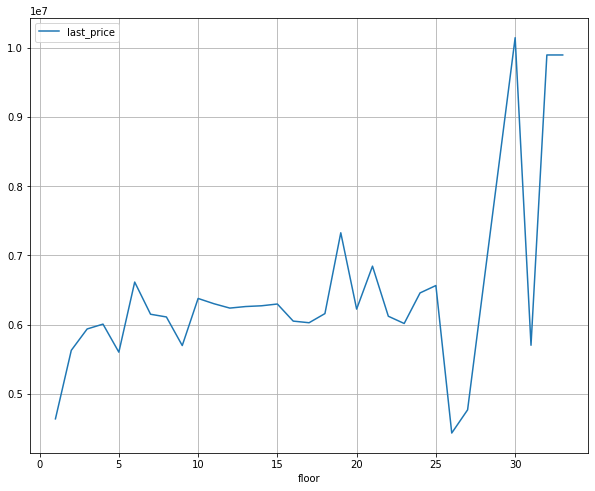

Корреляция Пирсона:  0.07


In [48]:
table10 = pd.pivot_table(data, index=['floor'], values=['last_price'])
table10 = table10.reset_index(drop=False)
#table10 = table10.rename(columns={'mean':'mean_price'})
table10.plot(x='floor', y='last_price', kind='line', grid=True, figsize=(10,8))
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['floor']), 2))

- Коэффициент корреляции стремится к нулю, а значит зависимости нет

**6) Дата публикации**

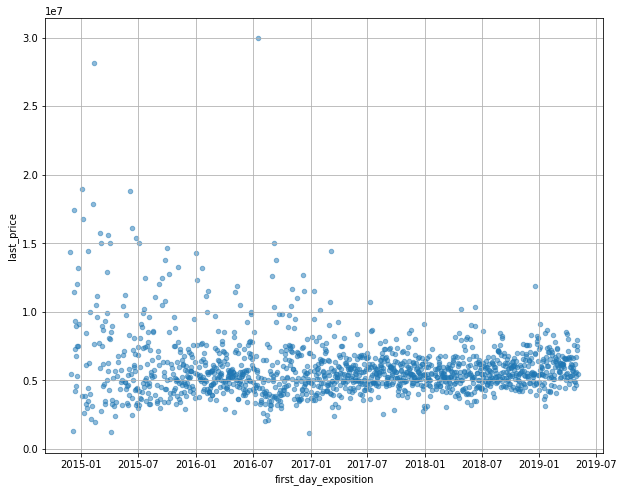

In [49]:
table6 = pd.pivot_table(data, index=['first_day_exposition'], values=['last_price'])
table6 = table6.reset_index(drop=False)
#table6 = table6.rename(columns={'mean':'mean_price'})
table6.plot(x='first_day_exposition', y='last_price', kind='scatter', grid=True, figsize=(10,8), alpha=0.5)
plt.show()

- Видно, что от времени цена не зависит. На протяжении пяти лет цена не увеличивалась. Коэффициент Пиросона стремится к 0.

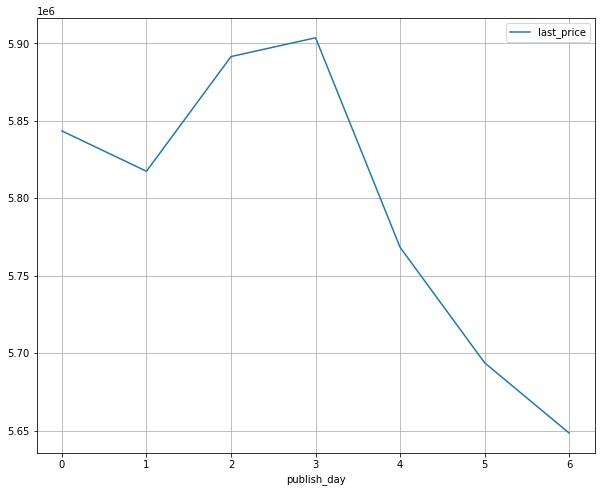

Корреляция Пирсона:  -0.01


In [50]:
table7 = pd.pivot_table(data, index=['publish_day'], values=['last_price'])
table7 = table7.reset_index(drop=False)
#table7 = table7.rename(columns={'mean':'mean_price'})
table7.plot(x='publish_day', y='last_price', kind='line', grid=True, figsize=(10,8))
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['publish_day']), 2))

- Зависимости нет

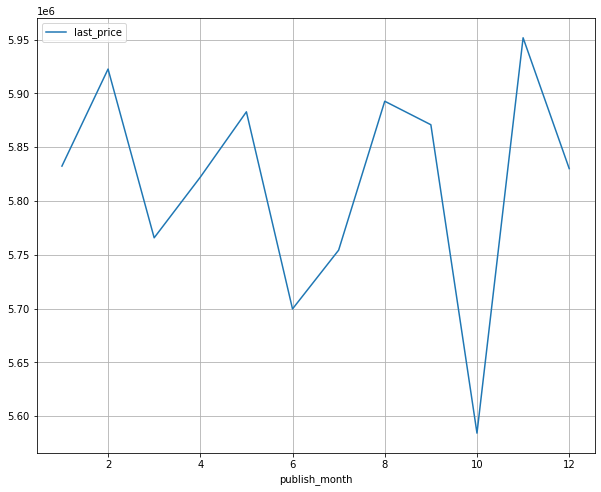

Корреляция Пирсона:  -0.0


In [51]:
table8 = pd.pivot_table(data, index=['publish_month'], values=['last_price'])
table8 = table8.reset_index(drop=False)
#table8 = table8.rename(columns={'mean':'mean_price'})
table8.plot(x='publish_month', y='last_price', kind='line', grid=True, figsize=(10,8))
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['publish_month']), 2))

- Зависимости нет

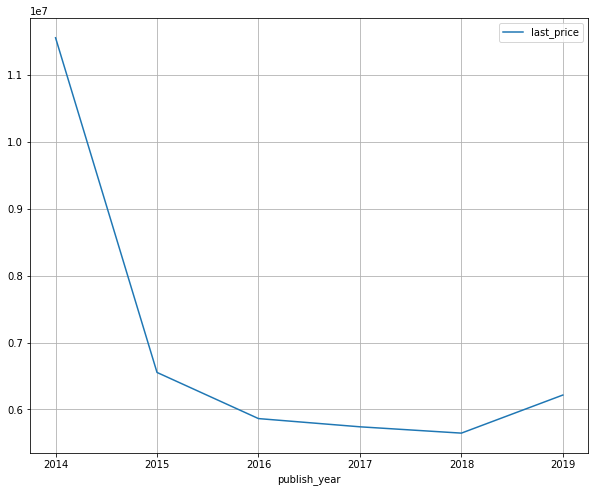

Корреляция Пирсона:  -0.01


In [52]:
table11 = pd.pivot_table(data, index=['publish_year'], values=['last_price'])
table11 = table11.reset_index(drop=False)
#table11 = table11.rename(columns={'mean':'mean_price'})
table11.plot(x='publish_year', y='last_price', kind='line', grid=True, figsize=(10,8))
plt.show()
print('Корреляция Пирсона: ', round(data['last_price'].corr(data['publish_year']), 2))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>
    


#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [53]:
display(data.groupby('locality_name_new')['meter_price'].
        agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10))

,count,mean
locality_name_new,,
Санкт-Петербург,14481,111348.638609
Мурино,540,85421.729074
Кудрово,431,95326.400696
Шушары,421,78267.212589
Всеволожск,377,68871.379841
Пушкин,344,102864.309884
Колпино,329,75161.306991
Парголово,314,90293.954459
Гатчина,286,69209.709091


- В Санкт-Петербурге самая высокая средняя цена на квадратный метр - 114757.8 рублей
- В Выборге самая низкая средняя цена на квадратный метр - 58238.1 рублей

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
 
 
<b>На доработку🤔:</b>
    
Нужно показать таблицу со средней ценой кв. метра 10 н.п. с **наибольшим числом объявлений**. Ты вывел топ-10 по средней цене, вряд ли в Лисьем Носу или Мистолово много объявлений=)

<div class="alert alert-info"> <b>Комментарий студента: сделано!</b> 

<div class="alert alert-success">
<h2> Комментарий ревьюера-2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>
    
Длинные строки лучше переносить для читабельности кода:
    
    data.groupby('locality_name_new')['meter_price'].agg(['count', 'mean']) \
        .sort_values(by='count', ascending=False).head(10) \
        .reset_index() \ 
        .rename(columns={'locality_name_new':'Нас. пункт',
                         'count':'Кол-во объявлений',
                         'mean':'Средняя цена за кв. метр'})

####  Квартиры в Санкт-Петербурге, средняя цена каждого километра. Зависимость цены на квартиру от расстояния до центра города.

In [54]:
data1 = data[data['locality_name'] == 'Санкт-Петербург'] #готовим данные. Берем только квартиры из Санкт-Петербурга
data1.reset_index(drop=True)
data1.loc[:, ['last_price', 'kilometres_to_city_centre']].groupby('kilometres_to_city_centre').mean()

,last_price
kilometres_to_city_centre,
0.0,1.511053e+07
1.0,1.201442e+07
2.0,1.165242e+07
3.0,9.700693e+06
4.0,1.050026e+07
5.0,1.114521e+07
6.0,1.088994e+07
7.0,1.086146e+07
8.0,8.799193e+06


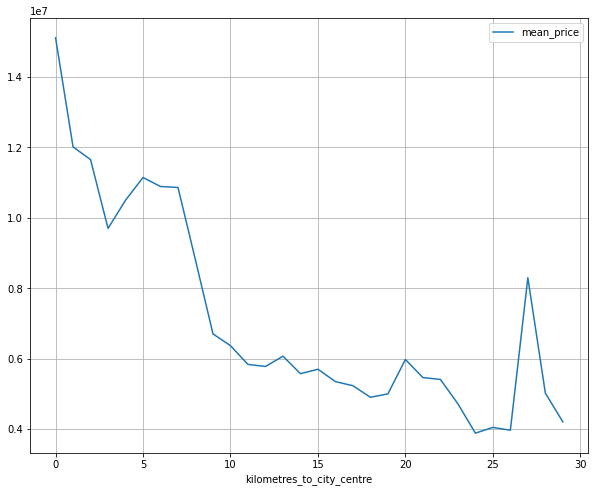

Корреляция Пирсона:  -0.4


In [55]:
table9 = pd.pivot_table(data1, index=['kilometres_to_city_centre'], values=['last_price'], aggfunc={'mean'})
table9 = table9.reset_index(drop=False,col_fill='kilometres_to_city_centre').droplevel(0, axis=1)
table9 = table9.rename(columns={'mean':'mean_price'})
table9
table9.plot('kilometres_to_city_centre', 'mean_price', kind='line', grid=True, figsize=(10,8))
plt.show()
print('Корреляция Пирсона: ', round(data1['last_price'].corr(data1['kilometres_to_city_centre']), 2))

- Можно наблюдать слабую обратную зависимость - чем дальше от центра, тем дешевле квартира. Ничего удивительного нет.
- Коэффициент корреляции это подтверждает: -0.4

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b>

**Вывод:**
- Необходимые параметры объявлений изучены: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления. Распределения данных близки к распределению Пуассона.
- Аномальные данные отмечены
- Время продажи квартир изучено. Распределение близко к Пуассоновскому, аномалий нет. Данные сильно смещены влево, так как среднее почти в 2 раза больше медианного значения. Основная масса квартир продается за первые 500 дней.
- Было обнаружено, что на стоимость квартиры влияют(в порядке убывания корреляции): общая площадь, площадь жилая, площадь кухни, количество комнат. Также на 1 этаже квартиры самые дешевые, на последнем самые дорогие. На остальных зависимости нет. Также нет зависимости от времени публикации.
- Самый дорогой квадратный метр в Зеленогорске - 115122.8, самый дешевый в Ставрополье - 11206.2
- C удалением от центра Петербурга цена на квартиры падает. То есть обратная зависимость, коэффициент корреляции -0.26.

### Общий вывод

1. В данном датафрейме было обнаружено множество пропусков - где-то даже больше половины. По возможности эти пропуски были заполнены. Неизвестна точная причина утечки - мог быть сбой или информации не было изначально.
2. Некоторые аномальные данные были исправлены. Небольшие выбросы местами остались, но они не портят картину, наоборот дополняют. Некоторые колонки были приведены к правильному типу данных.
3. Были добавлены новые данные(колонки), например цена квадратного метра. Эти данные помогают в исследовании.
4. Распределения параметров таких, как площадь(общая, жилая, кухни), цена, количество комнат, высота потолков и т.д. близки к Пуассоновскому. Аномалии незначительные.
5. Было обнаружено, что на стоимость квартиры влияют(в порядке убывания корреляции): общая площадь, площадь жилая, площадь кухни, количество комнат. Также на 1 этаже квартиры самые дешевые, на последнем самые дорогие. На остальных зависимости нет. Также нет зависимости от времени публикации.
6. Анализ самого дорогого и дешевого кв. метра: самый дорогой квадратный метр в Зеленогорске - 115122.8, самый дешевый в Ставрополье - 11206.2
7. Проанализирована связь удаленности от центра Петербурга и стоимостью квартиры: с удалением от центра Петербурга цена на квартиры падает. То есть обратная зависимость, коэффициент корреляции -0.26.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Отличные подробные выводы.

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.

**Отмечу отдельные положительные моменты проекта**:

* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* На каждом шагу проведен подробный анализ и написаны выводы
* Отличное оформление и графики

**Что нужно исправить**
* Добавить очистку от выбросов
* Скорректировать построение диаграмм рассеяения при анализе влияния размера площадей на стоимость
* Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
* Остальные рекомендации ты найдешь в комментариях выше.

Если есть вопросы, я готов на них ответить.
    
Для будущего развития в плане визуализации советую обратить внимание на этот гайд по seaborn, библиотеке для визуализаци - примеры кода и графиков на русском
https://nbviewer.org/urls/mipt-stats.gitlab.io/courses/python/09_seaborn.ipynb
    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>
   



<blockquote>

**Общий вывод по проекту-2**

Отлично, почти всё исправлено!

**Что осталось исправить**
* Добавить очистку от выбросов по основным параметрам объявлений



    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>
   



<blockquote>

**Общий вывод по проекту-3**

Проект принят



    
**Успехов в дальнейшем обучении, у тебя всё получится!**
</blockquote>
   



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод